# Титаник. Кто выживет?

https://www.kaggle.com/c/titanic/

In [247]:
import numpy as np
import pandas as pd

In [248]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)

### Данные

In [249]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

In [250]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [251]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [252]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [253]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [254]:
train.Sex.value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

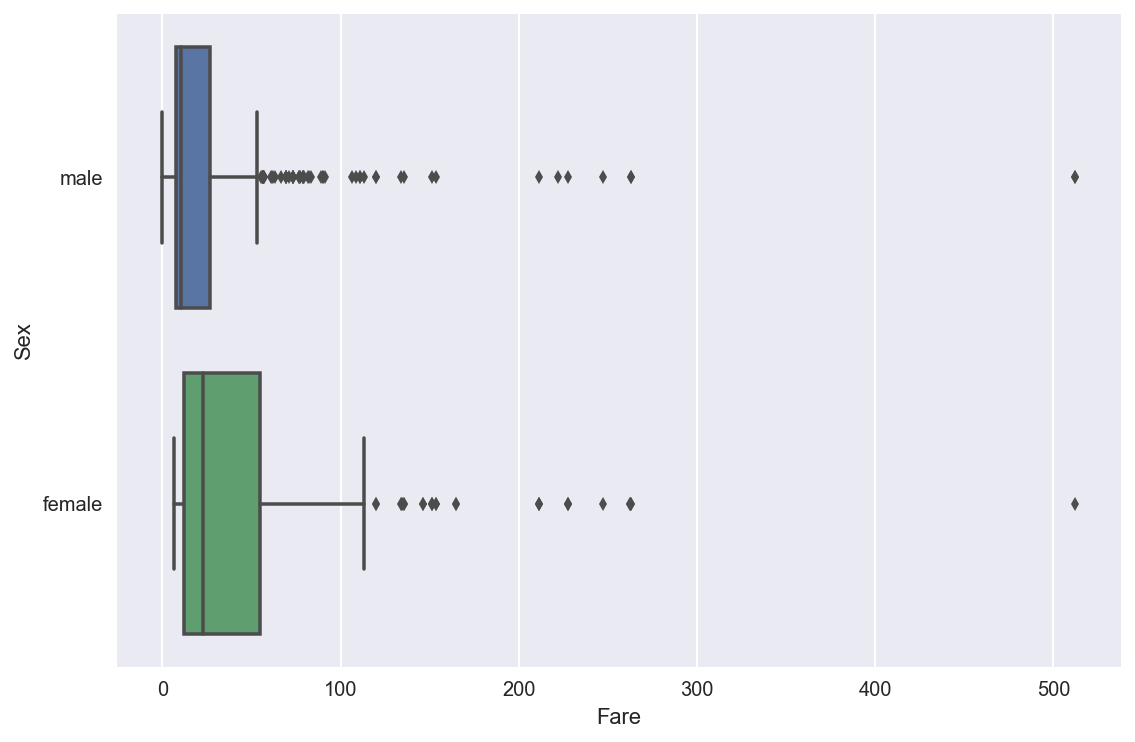

In [255]:
sns.boxplot(data=train, x='Fare', y='Sex')

In [256]:
train.groupby('Sex')['Pclass'].value_counts(normalize=True)

Sex     Pclass
female  3         0.458599
        1         0.299363
        2         0.242038
male    3         0.601386
        1         0.211438
        2         0.187175
Name: Pclass, dtype: float64

### Фичи

чтобы одинаковым образом обработать train и test и не дублировать все операции 2 раза, соединим эти два набора данных в один, не забыв при этом:
1. выкинуть целевую переменную из train
2. проверить на соответствие набора признаков друг другу
3. добавить флаг того, является ли объект тестовым или нет

In [257]:
y_train = train.Survived
train.drop('Survived', axis=1, inplace=True)

In [258]:
train.columns == test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True], dtype=bool)

In [259]:
train['is_test'] = 0
test['is_test'] = 1

In [260]:
df = pd.concat([train, test])

супер, теперь полный набор данных можно обрабатывать вместе и в любой момент, уже обработанными, обратно разъединить на обучающую и тестовую выборки

Пол male/female закодируем в 1/0 и удалим переменные, с которыми мы не будем сейчас работать

In [261]:
df["isMale"] = df.Sex.replace({"male": 1, "female":0})
df.drop(["Sex", "Cabin", "Ticket", "Name", "PassengerId"], axis=1, inplace=True)

признаки, значения которых составляют небольшой перечислимый набор, закодируем в отдельные столбцы 

In [262]:
df_dummies = pd.get_dummies(df, columns=['Pclass', 'Embarked'])

In [263]:
df_dummies.head(10)

,Age,SibSp,Parch,Fare,is_test,isMale,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,38.0,1,0,71.2833,0,0,1,0,0,1,0,0
2,26.0,0,0,7.9250,0,0,0,0,1,0,0,1
3,35.0,1,0,53.1000,0,0,1,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,0,0,1,0,0,1
5,NaN,0,0,8.4583,0,1,0,0,1,0,1,0
6,54.0,0,0,51.8625,0,1,1,0,0,0,0,1
7,2.0,3,1,21.0750,0,1,0,0,1,0,0,1
8,27.0,0,2,11.1333,0,0,0,0,1,0,0,1
9,14.0,1,0,30.0708,0,0,0,1,0,1,0,0


In [264]:
df_dummies.isnull().sum()

Age           263
SibSp           0
Parch           0
Fare            1
is_test         0
isMale          0
Pclass_1        0
Pclass_2        0
Pclass_3        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [265]:
X_train = df_dummies[df_dummies.is_test==0].drop('is_test', axis=1)
X_test = df_dummies[df_dummies.is_test==1].drop('is_test', axis=1)

In [266]:
columns = X_train.columns

In [267]:
X_train.head(10)

,Age,SibSp,Parch,Fare,isMale,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,1,0,0,1,0,0,1
1,38.0,1,0,71.2833,0,1,0,0,1,0,0
2,26.0,0,0,7.9250,0,0,0,1,0,0,1
3,35.0,1,0,53.1000,0,1,0,0,0,0,1
4,35.0,0,0,8.0500,1,0,0,1,0,0,1
5,NaN,0,0,8.4583,1,0,0,1,0,1,0
6,54.0,0,0,51.8625,1,1,0,0,0,0,1
7,2.0,3,1,21.0750,1,0,0,1,0,0,1
8,27.0,0,2,11.1333,0,0,0,1,0,0,1
9,14.0,1,0,30.0708,0,0,1,0,1,0,0


### Заполнение пустых значений

заполним пустые значения средними по соответственным признакам

In [268]:
from sklearn.preprocessing import Imputer

In [269]:
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0, verbose=0, copy=True)

In [270]:
imputer.fit(X_train)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [271]:
X_train_imputed = imputer.transform(X_train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=columns)

In [272]:
X_train_imputed.head(10)

,Age,SibSp,Parch,Fare,isMale,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.000000,1.0,0.0,7.2500,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,38.000000,1.0,0.0,71.2833,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,26.000000,0.0,0.0,7.9250,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,35.000000,1.0,0.0,53.1000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,35.000000,0.0,0.0,8.0500,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5,29.699118,0.0,0.0,8.4583,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6,54.000000,0.0,0.0,51.8625,1.0,1.0,0.0,0.0,0.0,0.0,1.0
7,2.000000,3.0,1.0,21.0750,1.0,0.0,0.0,1.0,0.0,0.0,1.0
8,27.000000,0.0,2.0,11.1333,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,14.000000,1.0,0.0,30.0708,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [273]:
X_train_imputed.head()

,Age,SibSp,Parch,Fare,isMale,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,35.0,1.0,0.0,53.1000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [489]:
X_test

,Age,SibSp,Parch,Fare,isMale,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,1,0,0,1,0,1,0
1,47.0,1,0,7.0000,0,0,0,1,0,0,1
2,62.0,0,0,9.6875,1,0,1,0,0,1,0
3,27.0,0,0,8.6625,1,0,0,1,0,0,1
4,22.0,1,1,12.2875,0,0,0,1,0,0,1
5,14.0,0,0,9.2250,1,0,0,1,0,0,1
6,30.0,0,0,7.6292,0,0,0,1,0,1,0
7,26.0,1,1,29.0000,1,0,1,0,0,0,1
8,18.0,0,0,7.2292,0,0,0,1,1,0,0
9,21.0,2,0,24.1500,1,0,0,1,0,0,1


### Нормировка значений

In [275]:
from sklearn.preprocessing import StandardScaler

In [276]:
scaler = StandardScaler()

In [277]:
scaler.fit(X_train_imputed)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [278]:
X_train_imputed_scaled = scaler.transform(X_train_imputed)

In [312]:
X_train_imputed_scaled = pd.DataFrame(X_train_imputed_scaled, columns = columns)

In [373]:
X_train_imputed_scaled.head(10)

,Age,SibSp,Parch,Fare,isMale,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,-0.592481,0.432793,-0.473674,-0.502445,0.737695,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
1,0.638789,0.432793,-0.473674,0.786845,-1.355574,1.767767,-0.510152,-1.107926,2.074505,-0.307562,-1.614710
2,-0.284663,-0.474545,-0.473674,-0.488854,-1.355574,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
3,0.407926,0.432793,-0.473674,0.420730,-1.355574,1.767767,-0.510152,-1.107926,-0.482043,-0.307562,0.619306
4,0.407926,-0.474545,-0.473674,-0.486337,0.737695,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
5,0.000000,-0.474545,-0.473674,-0.478116,0.737695,-0.565685,-0.510152,0.902587,-0.482043,3.251373,-1.614710
6,1.870059,-0.474545,-0.473674,0.395814,0.737695,1.767767,-0.510152,-1.107926,-0.482043,-0.307562,0.619306
7,-2.131568,2.247470,0.767630,-0.224083,0.737695,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
8,-0.207709,-0.474545,2.008933,-0.424256,-1.355574,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
9,-1.208115,0.432793,-0.473674,-0.042956,-1.355574,-0.565685,1.960202,-1.107926,2.074505,-0.307562,-1.614710


In [482]:
X_test_imputed_scaled = scaler.transform(imputer.transform(X_test))

In [483]:
X_test_imputed_scaled.shape

(418, 11)

### Разделение на обучающую и тестирующую выборки

In [484]:
from sklearn.model_selection import train_test_split

In [485]:
X_train_imputed_scaled1, X_test1, y_train1, y_test1 = train_test_split(X_train_imputed_scaled, y_train, test_size=0.2, random_state = 0)

### Обучение с кросс-валидацией

кросс-валидация поможет нам подобрать лучший параметр регуляризации

In [414]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [415]:
from sklearn.cross_validation import cross_val_score

In [423]:
clf = DecisionTreeClassifier()

In [424]:
scores = cross_val_score(clf, X_train_imputed_scaled1, y_train1, cv=10, scoring='accuracy')
print(scores)

[ 0.75        0.75        0.75        0.8028169   0.78873239  0.8028169
  0.71830986  0.70422535  0.78873239  0.82857143]


In [425]:
clf.fit(X_train_imputed_scaled1, y_train1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [426]:
clf.feature_importances_

array([ 0.24356085,  0.0652274 ,  0.02339413,  0.24982454,  0.30738179,
        0.02052917,  0.00310941,  0.07544843,  0.00607701,  0.        ,
        0.00544728])

In [427]:
X_train_imputed_scaled1.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'isMale', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [428]:
from sklearn.model_selection import GridSearchCV

In [429]:
params = [ {'max_depth': list( range(1, 20) )} ]

In [430]:
gs = GridSearchCV(clf, param_grid = params, cv = 10, scoring = 'accuracy' )

In [431]:
gs.fit(X_train_imputed_scaled1, y_train1)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [432]:
gs.best_params_

{'max_depth': 3}

In [686]:
clf_final = DecisionTreeClassifier(max_depth=6, random_state = 0)

In [687]:
clf_final.fit(X_train_imputed_scaled, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [688]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [689]:
get_tree_dot_view(clf_final, feature_names=X_train_imputed_scaled1.columns)

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="isMale <= -0.3089\ngini = 0.473\nsamples = 891\nvalue = [549, 342]", fillcolor="#e5813960"] ;
1 [label="Pclass_3 <= -0.1027\ngini = 0.3828\nsamples = 314\nvalue = [81, 233]", fillcolor="#399de5a6"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Age <= -2.0931\ngini = 0.1003\nsamples = 170\nvalue = [9, 161]", fillcolor="#399de5f1"] ;
1 -> 2 ;
3 [label="Fare <= 1.139\ngini = 0.5\nsamples = 2\nvalue = [1, 1]", fillcolor="#e5813900"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]", fillcolor="#399de5ff"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]", fillcolor="#e58139ff"] ;
3 -> 5 ;
6 [label="Fare <= -0.0674\ngini = 0.0907\nsamples = 168\nvalue = [8, 160]", fillcolor="#399de5f2"] ;
2 -> 6 ;
7 [label="Fare <= -0.08\ngini = 0.1823\nsamples = 69\nvalue = [7, 62]", fillcolor="#399de5e2"] ;
6 -> 7 ;
8 [label="Age <= 2.024\ngini = 0.1609\nsamples = 68\nvalue = [6, 

In [690]:
with open("classifier.txt", "w") as f:
    f = export_graphviz(clf_final, out_file=f)

In [691]:
clf_final.predict_proba(X_test_imputed_scaled)

array([[ 0.91011236,  0.08988764],
       [ 1.        ,  0.        ],
       [ 0.91011236,  0.08988764],
       [ 0.91011236,  0.08988764],
       [ 0.33333333,  0.66666667],
       [ 0.91011236,  0.08988764],
       [ 0.25490196,  0.74509804],
       [ 0.91011236,  0.08988764],
       [ 0.25490196,  0.74509804],
       [ 0.91011236,  0.08988764],
       [ 0.91011236,  0.08988764],
       [ 1.        ,  0.        ],
       [ 0.        ,  1.        ],
       [ 0.91011236,  0.08988764],
       [ 0.        ,  1.        ],
       [ 0.07575758,  0.92424242],
       [ 0.91011236,  0.08988764],
       [ 0.81632653,  0.18367347],
       [ 0.57575758,  0.42424242],
       [ 1.        ,  0.        ],
       [ 0.9       ,  0.1       ],
       [ 0.2       ,  0.8       ],
       [ 0.        ,  1.        ],
       [ 0.61842105,  0.38157895],
       [ 0.2       ,  0.8       ],
       [ 0.91011236,  0.08988764],
       [ 0.        ,  1.        ],
       [ 0.81632653,  0.18367347],
       [ 0.61842105,

In [692]:
predictions = clf_final.predict(X_test_imputed_scaled)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [693]:
sample_submission = pd.read_csv('submission_ex.csv')

In [694]:
submussion = 'PassengerId,Survived\n'
submussion += "\n".join(["{},{}".format(pid, prediction) for pid, prediction in zip(sample_submission.PassengerId, predictions)])

In [695]:
with open('submission1.csv', 'w') as file:
    file.write(submussion)

In [696]:
clf_final.score

<bound method ClassifierMixin.score of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')>

In [697]:
predictions = clf_final.predict_proba(X_test1)

In [698]:
predictions[:,1]

array([ 0.18367347,  0.08988764,  0.        ,  1.        ,  0.74509804,
        0.38157895,  1.        ,  0.8       ,  0.38157895,  0.74509804,
        0.08988764,  0.92424242,  0.08988764,  0.92424242,  1.        ,
        0.42424242,  0.08988764,  0.08988764,  0.08988764,  1.        ,
        0.08988764,  1.        ,  0.08988764,  0.38157895,  0.42424242,
        1.        ,  0.08988764,  0.42424242,  0.92424242,  0.        ,
        0.18367347,  0.92424242,  0.08988764,  0.38157895,  0.08988764,
        0.38157895,  0.08988764,  0.08988764,  0.08988764,  0.08988764,
        0.1       ,  0.18367347,  0.08988764,  0.08988764,  1.        ,
        0.08988764,  0.08988764,  1.        ,  0.08988764,  0.38157895,
        0.38157895,  0.38157895,  0.92424242,  0.08988764,  0.38157895,
        0.        ,  0.1       ,  0.        ,  0.        ,  0.08988764,
        0.18367347,  0.66666667,  1.        ,  0.38157895,  0.66666667,
        0.08988764,  0.92424242,  0.08988764,  1.        ,  1.  

In [699]:
for pair in zip(y_test1, predictions[:,1]):
    print(pair)

(0, 0.18367346938775511)
(0, 0.0898876404494382)
(0, 0.0)
(1, 1.0)
(1, 0.74509803921568629)
(1, 0.38157894736842107)
(1, 1.0)
(1, 0.80000000000000004)
(1, 0.38157894736842107)
(1, 0.74509803921568629)
(0, 0.0898876404494382)
(1, 0.9242424242424242)
(0, 0.0898876404494382)
(1, 0.9242424242424242)
(1, 1.0)
(0, 0.42424242424242425)
(0, 0.0898876404494382)
(0, 0.0898876404494382)
(0, 0.0898876404494382)
(1, 1.0)
(0, 0.0898876404494382)
(1, 1.0)
(0, 0.0898876404494382)
(0, 0.38157894736842107)
(0, 0.42424242424242425)
(1, 1.0)
(0, 0.0898876404494382)
(1, 0.42424242424242425)
(1, 0.9242424242424242)
(0, 0.0)
(0, 0.18367346938775511)
(1, 0.9242424242424242)
(0, 0.0898876404494382)
(1, 0.38157894736842107)
(0, 0.0898876404494382)
(1, 0.38157894736842107)
(0, 0.0898876404494382)
(0, 0.0898876404494382)
(0, 0.0898876404494382)
(0, 0.0898876404494382)
(1, 0.10000000000000001)
(0, 0.18367346938775511)
(0, 0.0898876404494382)
(0, 0.0898876404494382)
(1, 1.0)
(0, 0.0898876404494382)
(0, 0.0898876404

In [700]:
from sklearn.metrics import precision_recall_curve

In [701]:
pr, re, thres = precision_recall_curve( y_test1, predictions[:,1])

In [702]:
for line in zip(pr, re, thres):
    print(line)

(0.41317365269461076, 1.0, 0.0898876404494382)
(0.68041237113402064, 0.95652173913043481, 0.10000000000000001)
(0.69892473118279574, 0.94202898550724634, 0.18367346938775511)
(0.76190476190476186, 0.92753623188405798, 0.20000000000000001)
(0.77108433734939763, 0.92753623188405798, 0.38157894736842107)
(0.83076923076923082, 0.78260869565217395, 0.42424242424242425)
(0.91379310344827591, 0.76811594202898548, 0.59999999999999998)
(0.91228070175438591, 0.75362318840579712, 0.66666666666666663)
(0.92156862745098034, 0.6811594202898551, 0.74509803921568629)
(0.97674418604651159, 0.60869565217391308, 0.80000000000000004)
(0.97560975609756095, 0.57971014492753625, 0.9242424242424242)
(1.0, 0.36231884057971014, 1.0)


In [703]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


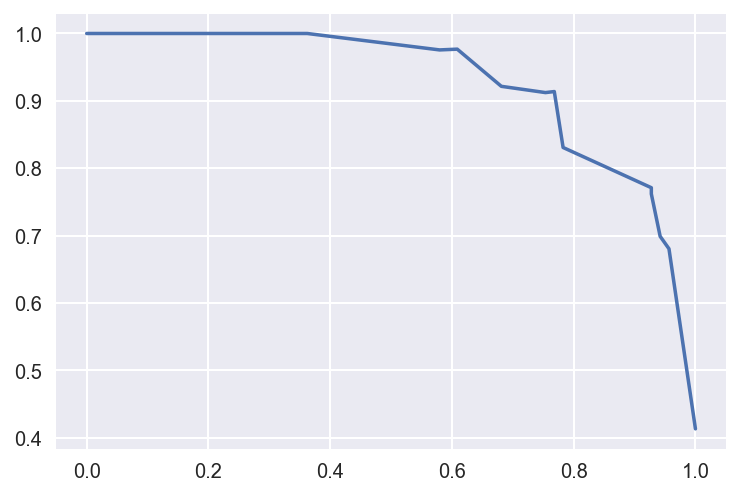

In [704]:
plt.plot(re, pr)

In [705]:
from sklearn.metrics import roc_curve

In [706]:
fpr, tpr, thres = roc_curve(y_test1, predictions[:,1])

In [707]:
for line in zip(fpr, tpr, thres):
    print(line)

(0.0, 0.36231884057971014, 1.0)
(0.0090909090909090905, 0.57971014492753625, 0.9242424242424242)
(0.0090909090909090905, 0.60869565217391308, 0.80000000000000004)
(0.036363636363636362, 0.6811594202898551, 0.74509803921568629)
(0.045454545454545456, 0.75362318840579712, 0.66666666666666663)
(0.045454545454545456, 0.76811594202898548, 0.59999999999999998)
(0.10000000000000001, 0.78260869565217395, 0.42424242424242425)
(0.17272727272727273, 0.92753623188405798, 0.38157894736842107)
(0.18181818181818182, 0.92753623188405798, 0.20000000000000001)
(0.25454545454545452, 0.94202898550724634, 0.18367346938775511)
(0.2818181818181818, 0.95652173913043481, 0.10000000000000001)
(0.89090909090909087, 1.0, 0.0898876404494382)
(1.0, 1.0, 0.0)


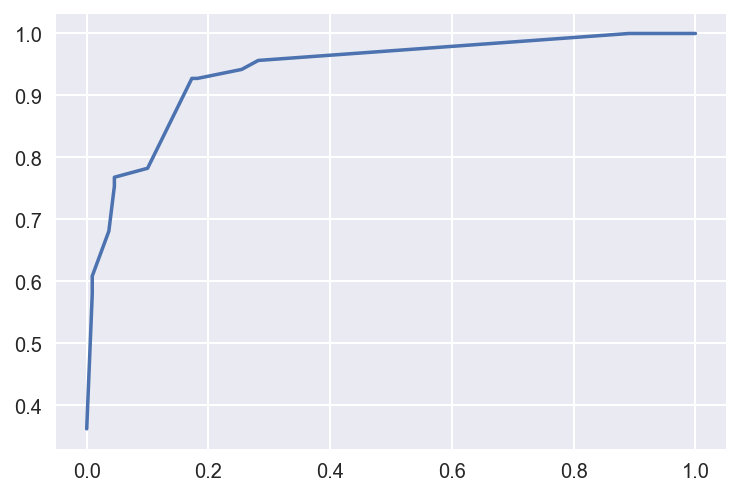

In [708]:
plt.plot(fpr, tpr)

In [709]:
from sklearn.metrics import average_precision_score

In [710]:
average_precision_score(y_test1, predictions[:,1])

0.92688232917943902

In [711]:
from sklearn.metrics import roc_auc_score

In [712]:
roc_auc_score(y_test1, predictions[:,1])

0.94011857707509883